In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import func

In [11]:
N=100
P=5
M=3
weight=[ 1/3  , 1/3 , 1/3]
mean=  [-2 , 0 ,  2 ]
covs=  [  0.7  ,0.7,  0.7 ]#标准差
Theta=np.array([weight,mean,covs])

In [12]:
weight1=[ 1/3  , 1/3 , 1/3]
mean1=  [  -2  ,  0  ,  2 ]
covs1=  [  0.5 , 0.5 , 0.5 ]#标准差
Theta1=np.array([weight1,mean1,covs1])

In [3]:
#定义各组样本量的界点
subnum=np.zeros(M-1)
subnum[0]=N*weight[0]
weight1=np.zeros(M+1)
weight1[0]=0
weight1[M]=1
for i in range(1,M-1):
    subnum[i]=subnum[i-1]+N*weight[i]
for i in range(1,M):
    weight1[i]=np.sum(weight[:i])

In [4]:
#beta的生成
np.random.seed(123)
'''
Beta=0.5*(np.random.rand(100,5)+1)
'''
betat=0.5*np.random.rand(5)+0.5
betat

array([0.84823459, 0.64306967, 0.61342573, 0.77565738, 0.85973448])

In [5]:
#x的生成
def creatX():#X[i,j]表示第i个样本第j维分量
    mu=np.array([0,0,0,0,0])
    cov=np.array([[1,0.3,0.3,0.3,0.3],[0.3,1,0.3,0.3,0.3],[0.3,0.3,1,0.3,0.3],[0.3,0.3,0.3,1,0.3],[0.3,0.3,0.3,0.3,1]])
    X=np.random.multivariate_normal(mu,cov,N,check_valid='raise')
    return X

In [6]:
def creatY(Xs):#一次实验生成的样本情况，Y[i]表示第i个样本的响应变量
    Y=np.zeros(N)
    hatY=np.zeros(N)
    tgroup=np.zeros(N)
    for i in range(N):
        a=np.random.rand()
        for j in range(M):
            if a>=weight1[j] and a<=weight1[j+1]:
                hatY[i]=np.dot(Xs[i],betat)
                Y[i]=hatY[i]+np.random.normal(Theta[1,j],Theta[2,j])
                tgroup[i]=int(j)
                break
    return Y,tgroup,hatY

In [7]:
#100次实验，每次100个样本，sampleY[i,j]表示第i次实验第j个样本的响应变量
sampleY=np.zeros((100,N))
#sgroup[i,j]表示第i次实验第j个样本的真实组数
sgroup=np.zeros((100,N))
#sampleX[i,j,k]表示第i次实验第j个样本的第h个分量
sampleX=np.zeros((100,N,5))
trueY=np.zeros((100,N))
for i in range(100):
    Xi=creatX()
    sam=creatY(Xi)
    sampleX[i]=Xi
    trueY[i]=sam[2]
    sampleY[i]=sam[0]
    sgroup[i]=sam[1]

In [8]:
np.save('sampleY.npy',sampleY)
np.save('sgroup.npy',sgroup)
np.save('sampleX.npy',sampleX)
np.save('trueY.npy',trueY)

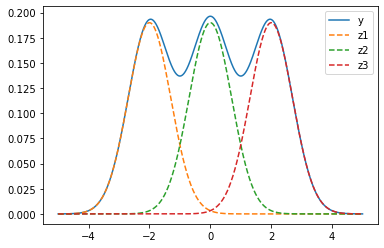

In [13]:
xnum = np.linspace(-5,5,2000) # 从0到1，等分50分
high = func.mixnormal(xnum,Theta)
z1 = weight[0]*func.normal(xnum,Theta[1:,0])
z2 = weight[1]*func.normal(xnum,Theta[1:,1])
z3 = weight[2]*func.normal(xnum,Theta[1:,2])
plt.figure() # 定义一个图像窗口
plt.plot(xnum,high) # 绘制曲线 y
plt.plot(xnum,z1,linestyle='--')
plt.plot(xnum,z2,linestyle='--')
plt.plot(xnum,z3,linestyle='--')
plt.legend(['y','z1','z2','z3',])
plt.show()

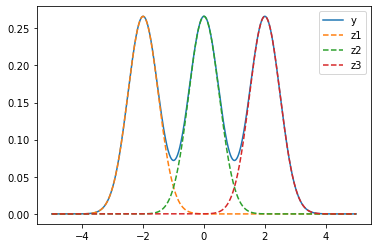

In [14]:
xnum = np.linspace(-5,5,2000) # 从0到1，等分50分
high = func.mixnormal(xnum,Theta1)
z1 = weight1[0]*func.normal(xnum,Theta1[1:,0])
z2 = weight1[1]*func.normal(xnum,Theta1[1:,1])
z3 = weight1[2]*func.normal(xnum,Theta1[1:,2])
plt.figure() # 定义一个图像窗口
plt.plot(xnum,high) # 绘制曲线 y
plt.plot(xnum,z1,linestyle='--')
plt.plot(xnum,z2,linestyle='--')
plt.plot(xnum,z3,linestyle='--')
plt.legend(['y','z1','z2','z3',])
plt.show()